### Error Bars and Confidence Intervals

Error Bars

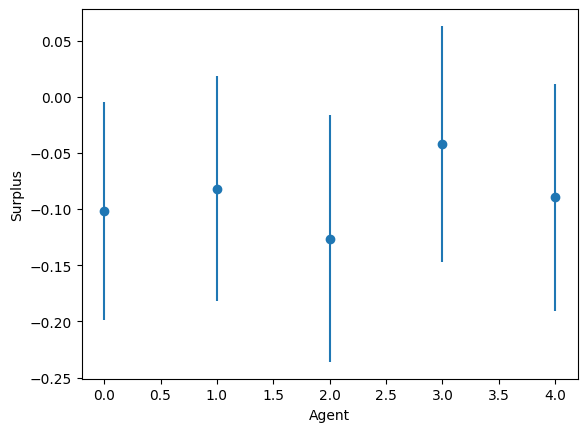

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# example data
num_agents = 5
num_trials = 100
surplus_list = [np.random.normal(size=num_trials) for _ in range(num_agents)]

# compute means and standard errors
means = [np.mean(surplus) for surplus in surplus_list]
std_errs = [np.std(surplus) / np.sqrt(num_trials) for surplus in surplus_list]

# plot means with error bars
plt.errorbar(range(num_agents), means, yerr=std_errs, fmt='o')
plt.xlabel('Agent')
plt.ylabel('Surplus')
plt.show()


Confidence Intervals

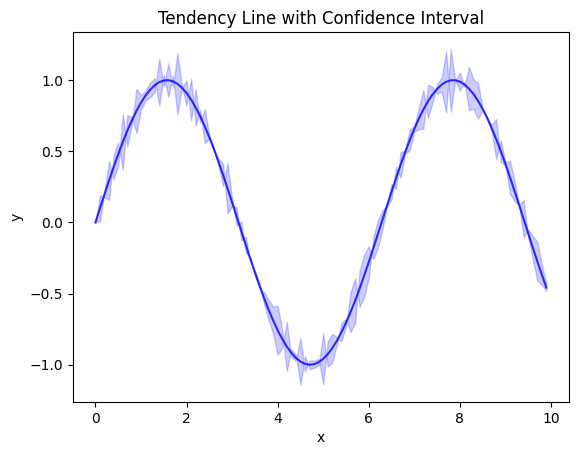

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0, 10, 0.1)
y = np.sin(x)
y_err = 0.1 * np.random.randn(len(x))

# plot tendency line
plt.plot(x, y, color='blue', alpha=0.8)

# plot confidence interval
plt.fill_between(x, y - y_err, y + y_err, color='blue', alpha=0.2)

# set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tendency Line with Confidence Interval')

# show plot
plt.show()


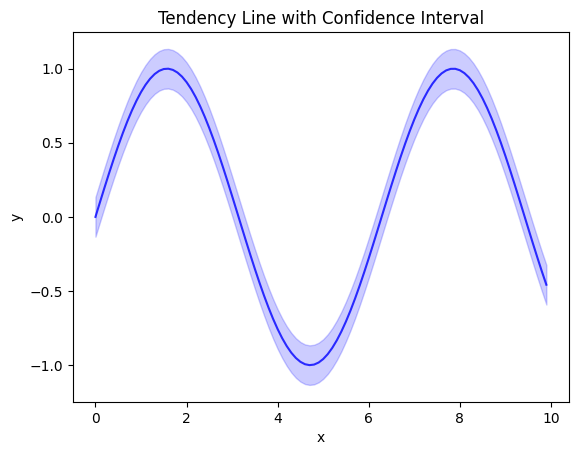

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# example data
x = np.arange(0, 10, 0.1)
y = np.sin(x)
y_err = stats.sem(y)  # calculate standard error

# plot tendency line
plt.plot(x, y, color='blue', alpha=0.8)

# plot confidence interval
plt.fill_between(x, y - 2*y_err, y + 2*y_err, color='blue', alpha=0.2)

# set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tendency Line with Confidence Interval')

# show plot
plt.show()


### SB3 SAC algo

In [ ]:
import gymnasium as gym
import numpy as np

from stable_baselines3 import SAC

env = gym.make("Pendulum-v1")
print(env.observation_space)

model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=100)
model.predict
# model.save("sac_pendulum")

# del model # remove to demonstrate saving and loading

# model = SAC.load("sac_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    print(action)
    print(_states)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

### Investigating how numpy masks work

In [74]:
import numpy as np
from numpy import random

x = np.array([100,200,300])
y = np.array([random.choice(x) for _ in range(10)])
win_mask = np.array([bool(random.binomial(1, 0.5)) for _ in range(10)])

print(x,'\n', y,'\n',win_mask)

[100 200 300] 
 [300 100 300 300 300 100 300 200 300 300] 
 [ True False  True  True  True  True False False  True  True]


In [75]:
mask_1 = np.array(y == x[0])

y[win_mask] += 17
print(y[win_mask])

print(y)

print(mask_1)

print(y[mask_1])

print(y[~mask_1])

[317 317 317 317 117 317 317]
[317 100 317 317 317 117 300 200 317 317]
[False  True False False False  True False False False False]
[100 117]
[317 317 317 317 300 200 317 317]


In [82]:
print(y)
print(y[win_mask])
print(y[mask_1])
mask_mask = win_mask & mask_1
print('----------')
print('w',win_mask)
print('1',mask_1)
print('M',mask_mask)
print(y[mask_mask])

[317 100 317 317 317 117 300 200 317 317]
[317 317 317 317 117 317 317]
[100 117]
----------
w [ True False  True  True  True  True False False  True  True]
1 [False  True False False False  True False False False False]
M [False False False False False  True False False False False]
[117]


### Stacked Bar Plot

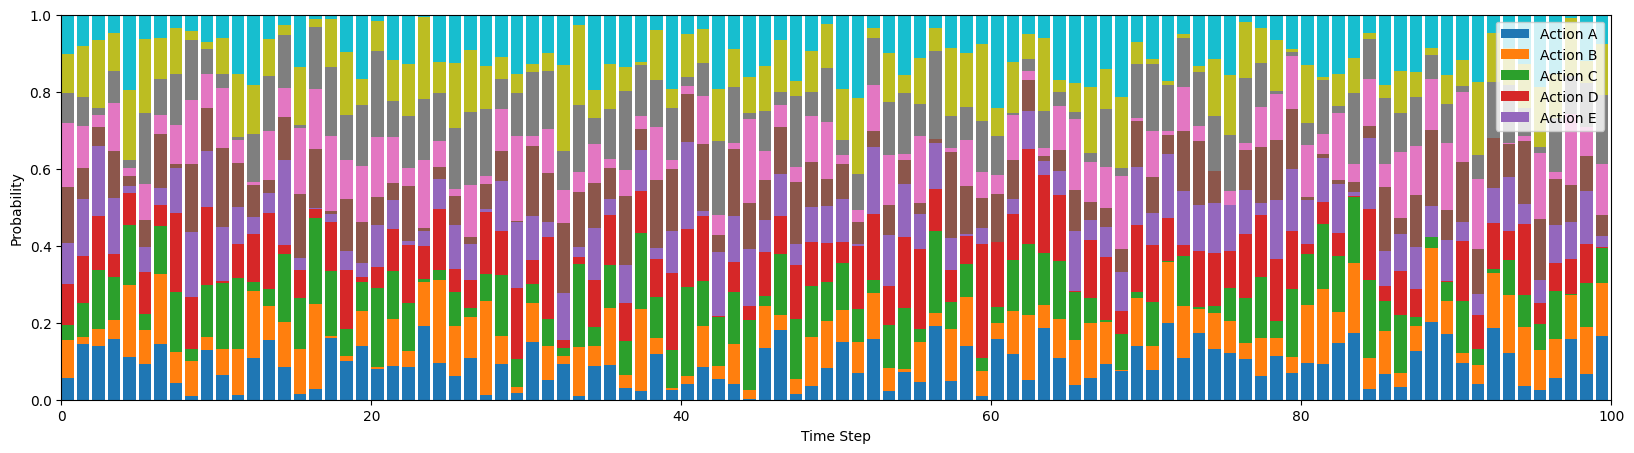

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming action_probabilities is a 2D numpy array where each row represents
# the probabilities of the 5 actions at a certain time step
# and each column represents a different action
action_probabilities = np.random.rand(100, 10)

# Normalize the probabilities so that they sum to 1 at each time step
normalized_probabilities = action_probabilities / np.sum(action_probabilities, axis=1)[:, None]

# Create the stacked bar plot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_xlim([0, len(normalized_probabilities)])
ax.set_ylim([0, 1])
ax.set_ylabel('Probabilities')
ax.set_xlabel('Time Step')

# Create the stacked bars
bars = []
for i in range(len(normalized_probabilities[0])):
    if i == 0:
        bars.append(ax.bar(np.arange(len(normalized_probabilities)), normalized_probabilities[:, i], align='edge'))
    else:
        bars.append(ax.bar(np.arange(len(normalized_probabilities)), normalized_probabilities[:, i], bottom=np.sum(normalized_probabilities[:, :i], axis=1), align='edge'))

# Add a legend
ax.legend([bar[0] for bar in bars], ['Action A', 'Action B', 'Action C', 'Action D', 'Action E'])

# Show the plot
plt.show()


### np.random.choice(array)
How To get random values np.random.choice() from deque and arrays

In [16]:
import numpy as np
from collections import deque

a = np.array([1,2,3,4,5])
b = np.array(['a','b','c','d','e'])
c = np.array([True,False,True,False,True])
d = np.array(np.random.rand(5))

ab = np.stack((a,b), axis=1)
ab = [tuple(x) for x in ab]

buffer = deque(maxlen=1000)

def add_to_buffer(state, action, done):
    buffer.append((state, action, done))

for i in range(a.size):
    # print(tuple(ab[i]), c[i], d[i])
    add_to_buffer(ab[i], c[i], d[i])

# print(len(buffer))

indexes = np.random.choice(range(len(buffer)), 3, replace=False)
samples = [buffer[i] for i in indexes]
indexes, samples

('1', 'a') True 0.7438860926391048
('2', 'b') False 0.6521709325734536
('3', 'c') True 0.22841953183355923
('4', 'd') False 0.07632829639617733
('5', 'e') True 0.01945412700187399
5


(array([3, 1, 0]),
 [(('4', 'd'), False, 0.07632829639617733),
  (('2', 'b'), False, 0.6521709325734536),
  (('1', 'a'), True, 0.7438860926391048)])

### overflow double_scalars

In [7]:
import numpy as np

ones = np.ones(10)
ones_2 = np.zeros_like(ones)

for i in range(10):
    ones_2[i] = ones[:i+1].sum()

ones_3 = [ones[:i+1].sum() for i in range(len(ones))]

ones_3

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [4]:
import numpy as np

#more
# [np.array(x)[:i+1].mean() for i,x in enumerate([np.array(self.regret)[:i+1].sum() for i in range(len(self.regret))]) ]

a = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
b = np.array([a[:i+1].mean() for i in range(len(a))])
a, b

(array([1., 0., 0., 0., 0.]),
 array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ]))

### check instance / subclass of object

In [1]:
class A:
    def __init__(self):
        pass

class A2(A):
    def __init__(self):
        super().__init__()

a1 = A()
a2 = A2()

print('a1, A -> ',isinstance(a1, A), '\t\ta1, A2 -> ', isinstance(a1, A2))
print('a2, A -> ',isinstance(a2, A), '\t\ta2, A2 -> ', isinstance(a2, A2))

# print('a1, A -> ',issubclass(A, A), '\t\ta1, A2 -> ', issubclass(A, A2))

a1, A ->  True 		a1, A2 ->  False
a2, A ->  True 		a2, A2 ->  True


### any value <0

In [40]:
import numpy as np

a = np.array([np.random.rand(5)*1.2-0.2])
# a, a[a<0].any()
a, (a<0).any()

(array([[ 0.81503721, -0.13060222,  0.30522736,  0.41021736,  0.47438325]]),
 True)

### working with tuples np

get value for dim1 when dim2==x

In [8]:
import numpy as np

seed=42
np.random.seed(seed)

# observations = np.random.rand(10, 5)
bids = np.arange(10, dtype=int)
actions = np.random.choice(bids, 100)
rewards = np.random.rand(100)

# print(observations)

act_rew = np.stack((actions, rewards), axis=0)

action = 4

act_rew_of_action = act_rew[:, act_rew[0] == action]

print(act_rew_of_action.T)
print(act_rew_of_action.shape)

# print(act_rew[1, act_rew[0] == action])
# print(obs_act_rew[:, obs_act_rew[1] < 0.2])

print(act_rew_of_action[0].size)
print(act_rew_of_action.shape[1])

[[4.         0.66884125]
 [4.         0.9717121 ]
 [4.         0.71066289]
 [4.         0.47537022]
 [4.         0.29563369]
 [4.         0.21844044]
 [4.         0.35256886]
 [4.         0.53093458]
 [4.         0.55289309]
 [4.         0.34866599]]
(2, 10)
10
10


### working with np.random.rand()

In [47]:
import numpy as np

np.random.seed(42)

obs = np.random.rand(10, 6)

sample = np.random.rand()*10
index = int(sample)

print(obs)
print(index, obs[index])

# x = np.array((sample, [int(s) for s in sample]))
# counts = np.zeros(10)
# for a in x.T:
    # counts[int(a[1])]+=1
# print(counts)

o = obs[np.random.randint(len(obs))]
o

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691]
 [0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802]
 [0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735]
 [0.59789998 0.92187424 0.0884925  0.19598286 0.04522729 0.32533033]]
3 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]


array([0.05808361, 0.86617615, 0.60111501, 0.70807258, 0.02058449,
       0.96990985])

### working with np.random.default_rng(seed)
#### (auction-gym's rng)

In [3]:
import numpy as np
seed = 42
rng = np.random.default_rng(seed)
np.random.seed(seed)

obs = np.random.rand(10, 6)

a = rng.choice([100,200,300])
b = rng.integers(0, 10)
o = rng.choice(obs)
a,b, o

(100,
 7,
 array([0.30461377, 0.09767211, 0.68423303, 0.44015249, 0.12203823,
        0.49517691]))

### append shit to []


In [67]:
import numpy as np
list1 =  []

np.random.seed(42)

a = np.random.rand(10)
b = np.random.randint(100, size=(10))
c = np.arange(10)

bc = np.stack((b,c), axis=1)

list1.extend(a)
list1.extend(bc)

list1

[0.3745401188473625,
 0.9507143064099162,
 0.7319939418114051,
 0.5986584841970366,
 0.15601864044243652,
 0.15599452033620265,
 0.05808361216819946,
 0.8661761457749352,
 0.6011150117432088,
 0.7080725777960455,
 array([21,  0]),
 array([52,  1]),
 array([1, 2]),
 array([87,  3]),
 array([29,  4]),
 array([37,  5]),
 array([1, 6]),
 array([63,  7]),
 array([59,  8]),
 array([20,  9])]

### true / false for lists [ ]

In [73]:
a = [1]
b = []
x = {}==dict()

print('a') if a else print('not a')
print('b') if b else print('not b')
print('dict') if x else print('not dict')

a
not b
dict


### checking my BidEnv for SB3

In [2]:
from stable_baselines3.common.env_checker import check_env
from ModelsMine import BidEnv
import numpy as np

rng = np.random.default_rng(42)

env = BidEnv(rng=rng,
             num_bids=10)
env.observations.extend(rng.random((10, 6),dtype=np.float32))
env.actions_rewards.extend(rng.random((10, 2)))
# print(env.actions_rewards)
# print(env.observations)
# It will check your custom environment and output additional warnings if needed
check_env(env)

inf -inf


### check append()

In [2]:
def funct1():
    return 1,2,3

a = []
for i in range(5):
    a.append(funct1())
b = [funct1() for i in range(5)]

print(a)
print(b)

[(1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3)]
[(1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3)]


### check masks on arrays passed with mask

In [19]:
import numpy as np

np.random.seed(42)

a = np.random.randint(low=0,high=100,size=20)
b = np.random.choice([True,False],size=20)
print(a)
print(b)

assert a[b].size == b.sum()
print()
print(a[b])
ab = a[b]
c = ab > 50
c, ab[c]

[51 92 14 71 60 20 82 86 74 74 87 99 23  2 21 52  1 87 29 37]
[False False False  True  True False False False  True False  True  True
  True  True  True False False False False False]

[71 60 74 87 99 23  2 21]


(array([ True,  True,  True,  True,  True, False, False, False]),
 array([71, 60, 74, 87, 99]))

### testing * star operator

In [22]:
import numpy as np

a = np.arange(10)

print('a ->', a)
print('*a ->', *a)

a -> [0 1 2 3 4 5 6 7 8 9]
*a -> 0 1 2 3 4 5 6 7 8 9


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### clear list with list[:]

In [25]:
a = [1,2,3,4,5]
del a[:]
a

[]

### playing with threading

In [12]:
from threading import Thread
import threading
from time import sleep
import random

def function1(name:str):
    print(f'now running: {name}')
    sleep_time = random.randint(1, 10)
    sleep(sleep_time)
    print(f'function1 called by {name} done!\t\tIt took {sleep_time} seconds')

print('printing the active count: ', threading.active_count())
t1 = Thread(target=function1, args=('t1',))
t1.start()
t2 = Thread(target=function1, args=('t2',))
t2.start()
t3 = Thread(target=function1, args=('t3',))
t3.start()
print('printing the active count: ', threading.active_count())
t1.join()
t2.join()
t3.join()
sleep(1)
print('all done!')

printing the active count:  6
now running: t1
now running: t2
now running: t3
printing the active count:  9
function1 called by t1 done!		It took 4 seconds
function1 called by t2 done!		It took 8 seconds
function1 called by t3 done!		It took 9 seconds
all done!


In [13]:
import threading
from threading import Thread
from time import sleep

t = Thread(target=lambda: {print('going'), sleep(10), print('hello')})
t.start()
t.join()

print('done')

going
hello
done


In [22]:
from threading import Thread
from time import sleep
from tqdm.notebook import tqdm
from numpy.random import randint, seed

seed(42)

def funct1(num):
    for _ in tqdm(range(num), leave=False):
        sleep(1)
    return ['a','b','c','d','e'][randint(0,4)]

threads = [Thread(target=funct1, args=(randint(1,10),)) for _ in range(5)]
for t in threads:
    x = t.start()
    print(x)

for t in tqdm(threads, unit_scale=True):
    i = threads.index(t)
    x = t.join()
    print(x)
    print(f'#{i} has joined')


None
None
None
None
None


  0%|          | 0.00/5.00 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

None
#0 has joined
None
#1 has joined
None
#2 has joined
None
#3 has joined
None
#4 has joined


### eval() to instantiate a class from a string

In [3]:
class Obj1(object):
    def __init__(self, name):
        self.name = name
    
    def print_name(self):
        print(self.name)

obj1 = Obj1('obj1')

classname = 'Obj1'
obj2 = eval(classname)('obj2dsjfha')

obj1.print_name()
obj2.print_name()

'daje'

obj1
obj2dsjfha


'daje'

### assign tuple to list value

In [24]:
list1 = [None for _ in range(10)]

i = 3
j = 5

list1[i] = 1,2,3
list1[j] = (4,5,6)

list1

[None, None, None, (1, 2, 3), None, (4, 5, 6), None, None, None, None]

### get index from value, np array

In [43]:
from numpy.random import randint, seed, choice
from numpy import array

seed(42)

arr = randint(1,100,(10,), )
val = choice(arr)

# getting index of val in arr
index = (arr == val).nonzero()      # nonzero() returns indices of nonzero elements in np array, here indices of `True`s

print(arr)
print(val)
print(index)

[52 93 15 72 61 21 83 87 75 75]
87
(array([7], dtype=int64),)


In [52]:
arr2 = randint(1,10,(100))
val2 = choice(arr2)
index2 = (arr2 == val2).nonzero()

print(index2)
print(index2[0])
print(index2[0][0])

(array([30, 43, 56, 62, 65, 77], dtype=int64),)
[30 43 56 62 65 77]
30


### lognormal


In [8]:
import numpy as np

rng = np.random.default_rng(42)
items = rng.lognormal(0.1, 0.2, 1000)
print(items.mean())

seed = rng.choice(100)
seed

1.120440817075088


18

### lists and booleans

In [9]:
x = []
y = [1,2]

if x:
    print("x is true")
else:
    print("x is false")
if y:
    print("y is true")
else:
    print("y is false")

x is false
y is true


### np.reshape(-1,1) what it does

In [17]:
import numpy as np

a = np.array([1,2,3])
b = np.array([4])
b2 = np.array(4)
c = np.array([5,6])

print(a)
print(b)
print(b2)
print(c)

print("\n========================\n")

a = a.reshape(-1,1)
a2 = a.reshape(1,-1)
b = b.reshape(-1,1)
b2 = b2.reshape(1,-1)
b22 = b2.reshape(-1,1)
c = np.array([c])

print(a)
print(a2)
print(b)
print(b2)
print(b22)
print(c)

[1 2 3]
[4]
4
[5 6]


[[1]
 [2]
 [3]]
[[1 2 3]]
[[4]]
[[4]]
[[4]]
[[5 6]]


### simple NN in torch


In [3]:
import numpy as np
import torch as th
from torchsummary import summary

np.random.seed(42)
th.manual_seed(42)

mlp = th.nn.Sequential(
    th.nn.Linear(5,10),
    th.nn.Linear(10,20),
    th.nn.ReLU(),
    th.nn.Linear(20,1),
    th.nn.ReLU(),
    th.nn.Linear(1,1)    )

# print mlp architecture and param counts
summary(mlp, input_size=(10,5), device='cpu')

print()
print()
print()

x = th.from_numpy(np.random.normal(loc=1., scale=1.0, size=(10,6)).astype(np.float32))
x[:,5] = 1.
x = x[:, :-1]
for a in x:
    print(a)
th.nn.functional.normalize(x, p=2, dim=1, eps=1e-12, out=x)
y = x.mean(axis=1).reshape(-1,1)

for a,b in zip(x,y):
    print(a,b)

print()
print()
print()

yy = mlp(x)
print(yy.T)

loss = th.nn.MSELoss()
optimizer = th.optim.Adam(mlp.parameters(), lr=0.001)

#train
running_loss = 0.
last_train_loss = 0.

mlp.train()

for i in range(256):
    optimizer.zero_grad()
    y_pred = mlp(x)
    l = loss(y_pred, y)
    l.backward()
    optimizer.step()
    running_loss += l.item()
    if i % 1000 == 999:
        last_train_loss = running_loss / 1000 # loss per batch
        print('  batch {} loss: {}'.format(i + 1, last_train_loss))
        running_loss = 0.


yy = mlp(x)
print(yy.T)

th.save(mlp, "./models/mlp.pt")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 10]              60
            Linear-2               [-1, 10, 20]             220
              ReLU-3               [-1, 10, 20]               0
            Linear-4                [-1, 10, 1]              21
              ReLU-5                [-1, 10, 1]               0
            Linear-6                [-1, 10, 1]               2
Total params: 303
Trainable params: 303
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------



tensor([1.4967, 0.8617, 1.6477, 2.5230, 0.7658])
tensor([2.5792, 1.7674, 0.5305, 1.5426, 0.5366])
tensor([ 1.2420, -0.9133, -0.7249,  0.4377, -0.0128])
tensor([ 0.0920, -0.412

Sequential(
  (0): Linear(in_features=5, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=20, bias=True)
  (2): ReLU()
  (3): Linear(in_features=20, out_features=1, bias=True)
  (4): ReLU()
  (5): Linear(in_features=1, out_features=1, bias=True)
)

### testing how the gym breaks ties!

In [158]:
import numpy as np

# np.random.seed(42)
BIDS = [0.5, 0.7, 0.9]
num_agents = np.random.randint(5, 10)
agents_names = np.array(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'])
agents_names = agents_names[:num_agents]
print("agents names: \t\t", agents_names, "total of: ", agents_names.size)
bids = np.random.choice(BIDS, size=(num_agents,))
print("each agent bid: \t", bids) # two max bids, others are all unique -> PERFECT

num_slots = np.random.randint(1, agents_names.size+1)
print("number of slots: \t", num_slots)

winners = np.argsort(-bids)[:num_slots]
print("index of winners: \t", winners)
print("names of winners: \t", agents_names[winners])

print("as expected, ties are broken in favor of the first bidder!")


### RANDOMLY BREAK TIES
print()
print("=========================")
print("==== RANDOM SHUFFLE =====")
print("=========================")

# 1. get all unique bids that won a slot
winning_bids = np.sort( np.unique(bids[winners]) )[::-1]  # sort is ascending, [::-1] reverses the array
print("1. unique winning bids : ", winning_bids)

# 2. for each unique bid, get all indices of agents that bid that amount
winning_bids_indices = [np.where(bids == bid)[0] for bid in winning_bids]
print("2. indices of winning bids : ", *zip(winning_bids, winning_bids_indices))

# 3. randomly permute the indices
for indices in winning_bids_indices:
    np.random.shuffle(indices)
print("3. randomly permuted indices : ", *zip(winning_bids, winning_bids_indices))

# 4. assign the first num_slots indices to the winners
winners_new = np.concatenate(winning_bids_indices)[:num_slots]
# winners_new = winners_new[:num_slots]
print("4. indices of winners : ", winners_new)

assert len(winners) == num_slots
assert len(winners_new) == num_slots

'''
THE LOGIC, SHORT VERSION:
x
'''

agents names: 		 ['a1' 'a2' 'a3' 'a4' 'a5' 'a6' 'a7' 'a8' 'a9'] total of:  9
each agent bid: 	 [0.9 0.5 0.7 0.5 0.9 0.5 0.7 0.9 0.7]
number of slots: 	 1
index of winners: 	 [0]
names of winners: 	 ['a1']
as expected, ties are broken in favor of the first bidder!

==== RANDOM SHUFFLE =====
1. unique winning bids :  [0.9]
2. indices of winning bids :  (0.9, array([0, 4, 7], dtype=int64))
3. randomly permuted indices :  (0.9, array([0, 7, 4], dtype=int64))
4. indices of winners :  [0]


### pass list of lists as parameters

In [10]:
import numpy as np

np.random.seed(42)

n_agents = 4
n_bids_per_agent = 10
bids = np.random.rand(n_agents, n_bids_per_agent)
bids_lists = [[] for _ in range(n_agents)]
for i in range(n_agents):
    bids_lists[i] = list(bids[i])

stacked = np.vstack(bids_lists)
print(stacked)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]]


### calling super.funct() see attribute value


In [12]:
class c1:
    def __init__(self):
        self.BIDS = [0,1,2]

    def get_bids(self):
        return self.BIDS

class c2(c1):
    def __init__(self):
        super().__init__()
        self.BIDS = [3,4,5]
    
agent1 = c1()
agent2 = c2()

print(agent1.get_bids())
print(agent2.get_bids())


[0, 1, 2]
[3, 4, 5]


### kernel matrix update

In [13]:
import numpy as np

k_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
n = k_matrix.shape[0]

k_matrix = np.hstack((k_matrix, np.zeros((n, 1))))
k_matrix = np.vstack((k_matrix, np.zeros((1, n+1))))

print(k_matrix)

[[1. 2. 3. 0.]
 [4. 5. 6. 0.]
 [7. 8. 9. 0.]
 [0. 0. 0. 0.]]


### TIMING OF OPERATIONS
deque for & mul   VS   deque->nparray->deque 

In [22]:
from collections import deque
import numpy as np

def deque_mul_for(a):
    for i in range(len(a)):
        a[i] *= 2
    return a

def deque_mul_np(a):
    return deque(np.array(a) * 2)

import time
a = deque(range(300))
b = a.copy()

start_time = time.time()
deque_mul_for(a)
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
deque_mul_np(b)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0010018348693847656 seconds ---
--- 0.0010001659393310547 seconds ---


In [39]:
import time
import numpy as np
from collections import deque

def get_max(delta):
    max_index = 0
    max_value = delta[0]
    for i in range(1, len(delta)):
        if delta[i] > max_index:
            max_index = i
            max_value = delta[i]
    return max_value, max_index

def get_max_np0(delta):
    return np.max(delta), np.argmax(delta)

def get_max_np(delta):
    d = np.array(delta)
    return np.max(d), np.argmax(d)

delta = np.random.rand(400000)
delta = deque(delta)

start_time = time.time()
get_max(delta)
print("PLAIN\t --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
get_max_np0(delta)
print("NP0\t --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
get_max_np(delta)
print("NP\t --- %s seconds ---" % (time.time() - start_time))

PLAIN	 --- 7.5449652671813965 seconds ---
NP0	 --- 0.06995964050292969 seconds ---
NP	 --- 0.03580141067504883 seconds ---


In [52]:
def compute_delta_old(t):
    delta = deque()
    for i in range(t.shape[0]):
        delta.append(t[i])
    return delta

def compute_delta_np(t):
    return deque(t)

temp = np.random.rand( int(1e7) )

start_time = time.time()
compute_delta_old(temp)
print("OLD\t --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
compute_delta_np(temp)
print("NP\t --- %s seconds ---" % (time.time() - start_time))


OLD	 --- 2.4530017375946045 seconds ---
NP	 --- 0.7986767292022705 seconds ---


### np.hstack and np.vstack tutorial

In [65]:
from numpy import hstack, vstack
import numpy as np

mat = np.ones((5,5))

new_mat = np.zeros((3,3))

new_rows = np.ones((mat.shape[0], new_mat.shape[0])) * 8

print(mat)
print(new_mat)
print(new_rows)

mat = hstack((mat, new_rows))      # hstack = same rows amount
print("\n")
print(mat)

mat = vstack((  mat,
                hstack((new_rows.T, new_mat))    ))
print("\n")
print(mat)

#compress stuff

new_delta = hstack((new_rows.T, new_mat)).sum(axis=1)

print("\n")
print(new_delta)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]]


[[1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]]


[[1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 8. 8. 8.]
 [8. 8. 8. 8. 8. 0. 0. 0.]
 [8. 8. 8. 8. 8. 0. 0. 0.]
 [8. 8. 8. 8. 8. 0. 0. 0.]]


[24. 24. 24. 24. 24.  0.  0.  0.]


### variable being int or lambda function

In [17]:
val = 1.3
bid_to_beat = 0.8
BIDS = [0.1, 0.3, 0.5, 0.9, 1.1, 1.4]
arms_utility = [0] * len(BIDS)

auction_type = 'SecondPrice'
auction_type = 'FirstPrice'

if(auction_type == 'SecondPrice'):
    utility = lambda    arm:    val - bid_to_beat     if arm >= bid_to_beat     else 0
elif(auction_type == 'FirstPrice'):
    utility = lambda    arm:    val - arm             if arm >= bid_to_beat     else 0
# else:
#     utility=0

for j, arm in enumerate(BIDS):
    # val - prices[i] -> since if i exceed prices[i] i'd still pay prices[i] (the 2nd price)
    arms_utility[j] = utility(arm)

print(BIDS)
print(arms_utility)

[0.1, 0.3, 0.5, 0.9, 1.1, 1.4]
[0, 0, 0, 0.4, 0.19999999999999996, -0.09999999999999987]


### matplotlib subplot2grid

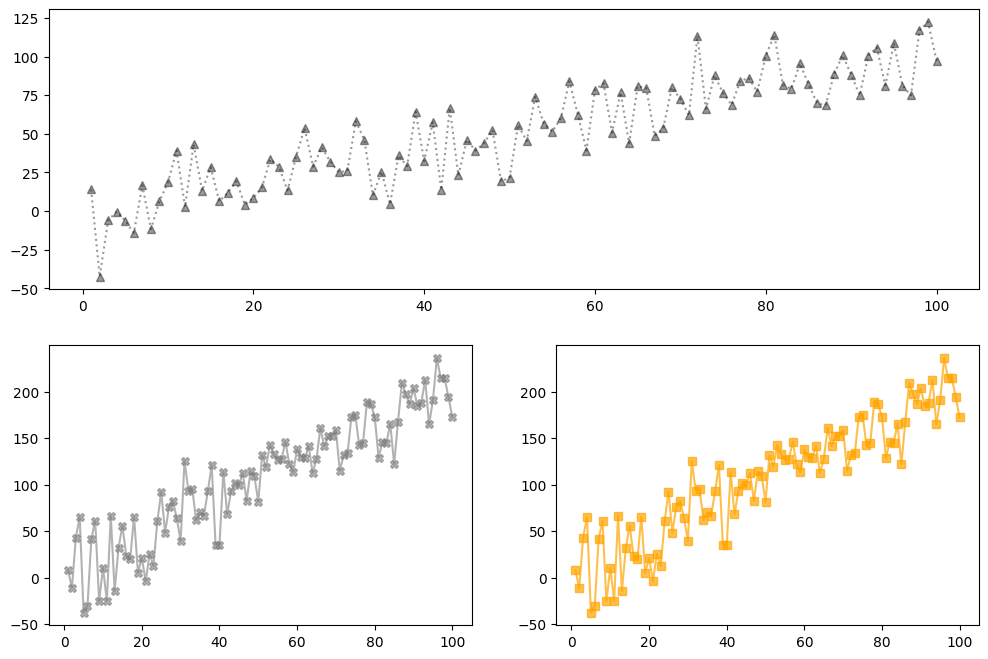

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
# from matplotlib.pyplot import gcf
import pandas as pd
import numpy as np
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*15+range(1,101), 'z_values': (np.random.randn(100)*15+range(1,101))*2 })

fig = plt.gcf()
fig.set_size_inches(12, 8)
gs = fig.add_gridspec(2, 2)

# Plot 1
ax1 = fig.add_subplot(gs[0:1, 0:2])
# ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
# ax1.plot( 'x_values', 'y_values', data=df, marker='.', alpha=0.4)
ax1.plot( 'x_values', 'y_values', '^k:', data=df, alpha=0.4)

# Plot 2
ax2 = fig.add_subplot(gs[1:2, 0:1])
# ax2 = fig.subplot2grid((2, 2), (1, 0), colspan=1)
ax2.plot( 'x_values','z_values', data=df, marker='X',  color="grey", alpha=0.6)

# Plot 3
ax3 = fig.add_subplot(gs[1:2, 1:2])
# ax3 = fig.subplot2grid((2, 2), (1, 1), colspan=1)
ax3.plot( 'x_values','z_values', data=df, marker='s', color="orange", alpha=0.7)

# Show the graph
plt.show()


### display graph from data.npy, when failed to build graph

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# INDEXES of the return
idx_auction_rev = 0
idx_social_welfare = 1
idx_advertisers_surplus = 2
idx_cumulative_surpluses = 3
idx_instant_surpluses = 4
idx_regrets = 5
idx_actions_rewards = 6


num_runs = 10
num_iter = 1000


graph_title = "FP_NoveltyBIGPR-Exp3-Expert (remote)"


my_agents_names = [
        "1. NoveltyBIGPR",
        "2. Exp3",
        "3. Expert KMeans"
]


def construct_graph(data, graph, xlabel, ylabel, insert_labels=False, fontsize=16):
    # data = np.array([x[index] for x in num_participants_2_metrics]).squeeze().transpose(1,0,2)

    y_err = []
    for i, agent in enumerate(data):
        y_err.append(agent.std(axis=0) / np.sqrt(num_runs))
        # data[i] = d.mean(axis=0)      # WHY TO DO THAT

    y = []
    for i, agent in enumerate(data):
        y.append(agent.mean(axis=0))

    for i, agent in enumerate(y):
        graph.plot(agent, label=my_agents_names[i])
        graph.fill_between(range(len(agent)), agent-y_err[i], agent+y_err[i], alpha=0.2)

    graph.set_xlabel(xlabel, fontsize=fontsize)
    graph.set_ylabel(ylabel, fontsize=fontsize)
    graph.set_xticks(list(range(0,num_iter,25)))
    graph.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    graph.axhline(0, color='black', lw=1, alpha=.7)

    if insert_labels:
        handles, labels = graph.get_legend_handles_labels()
        legend = graph.legend(reversed(handles),
                                reversed(labels),
                                loc='upper left',
                                bbox_to_anchor=(1.0, 1.0),
                                fontsize=fontsize)
    

def show_graph(runs_results, filename="noname", printFlag=False):
    plt.ioff()

    # # Create a new figure, plot into it, then close it so it never gets displayed
    # fig = plt.figure()
    # plt.plot([1,2,3])
    # plt.savefig('/tmp/test0.png')
    # plt.close(fig)

    # # Create a new figure, plot into it, then don't close it so it does get displayed
    # plt.figure()
    # plt.plot([1,3,2])
    # plt.savefig('/tmp/test1.png')

    # # Display all "open" (non-closed) figures
    # plt.show()

    fontsize = 16
    fig = plt.gcf()
    fig.set_size_inches(32,18)
    fig.sharey = 'all'
    gs = fig.add_gridspec(3, 2)


    graph_cumulative_surpluses = fig.add_subplot(gs[0:1, 0:2])
    graph_cumulative_regrets = fig.add_subplot(gs[1:2, 0:2])
    graph_instant_surpluses = fig.add_subplot(gs[2:3, 0:1])
    graph_regrets_hindsight = fig.add_subplot(gs[2:3, 1:2])

    graph_cumulative_surpluses.set_title(graph_title, fontsize=fontsize+4)

    # revenue, welfare, agent, agents_surplus = num_participants_2_metrics 

    #cumulative surpluses
    cumulative_surpluses = np.array([x[idx_cumulative_surpluses] for x in runs_results]).squeeze().transpose(1,0,2)
    instant_surpluses = np.array([x[idx_instant_surpluses] for x in runs_results]).squeeze().transpose(1,0,2)
    instant_regrets = np.array([x[idx_regrets] for x in runs_results]).squeeze().transpose(1,0,2)
    construct_graph(cumulative_surpluses, graph_cumulative_surpluses, '', 'Cumulative Surplus', insert_labels=True, fontsize=fontsize)
    construct_graph(instant_surpluses, graph_instant_surpluses, '', 'Instant Surplus', insert_labels=False, fontsize=fontsize)
    construct_graph(instant_regrets, graph_regrets_hindsight, '', 'Instant Regret in Hindsight', insert_labels=True, fontsize=fontsize)

    #cumulative regrets
    regrets_cumul = np.zeros_like(instant_regrets)
    for i in range(instant_regrets.shape[0]):
        for j in range(instant_regrets.shape[1]):
            regrets_cumul[i][j] = np.array([instant_regrets[i][j][:h+1].sum() for h in range(instant_regrets.shape[2])])
    construct_graph(regrets_cumul, graph_cumulative_regrets, '', 'Cumulative Regret in Hindsight', insert_labels=True, fontsize=fontsize)


    fig.tight_layout()

    plt.show()
    # ts = time.strftime("%Y%m%d-%H%M", time.localtime())
    # plt.savefig(filename)
    # if args.print: print(f"Plot saved to {filename}")
    # plt.close(fig)


In [12]:
data_dir = "results/remote-results/FP_NoveltyBIGPR-Exp3-Expert/20230721-0207/data.npy"

import numpy as np

print("starting load data")
data = np.load(data_dir, allow_pickle=True)
print("data loaded")

show_graph(data, "", True)

starting load data


data loaded


KeyboardInterrupt: 

In [7]:
print(data.shape)

data[0][0].shape

(10, 7)


(1000,)

In [9]:
show_graph(data, "", True)

KeyboardInterrupt: 